https://towardsdatascience.com/a-practical-example-in-transfer-learning-with-pytorch-846bb835f2db

In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

Import del Dataset

In [ ]:
# https://www.kaggle.com/datasets/tanlikesmath/the-oxfordiiit-pet-dataset

import os
from matplotlib import pyplot as plt
import random

os.environ['KAGGLE_USERNAME'] = "alebelo" # username from the json file
os.environ['KAGGLE_KEY'] = "608d2c18368663d519f0536d566b0dcb" # key from the json file

!kaggle datasets download -d tanlikesmath/the-oxfordiiit-pet-dataset # api copied from kaggle
!unzip -o ./the-oxfordiiit-pet-dataset.zip
os.remove('the-oxfordiiit-pet-dataset.zip')

Output streaming troncato alle ultime 5000 righe.
  inflating: images/images/leonberger_81.jpg  
  inflating: images/images/leonberger_82.jpg  
  inflating: images/images/leonberger_83.jpg  
  inflating: images/images/leonberger_84.jpg  
  inflating: images/images/leonberger_85.jpg  
  inflating: images/images/leonberger_86.jpg  
  inflating: images/images/leonberger_87.jpg  
  inflating: images/images/leonberger_88.jpg  
  inflating: images/images/leonberger_89.jpg  
  inflating: images/images/leonberger_9.jpg  
  inflating: images/images/leonberger_90.jpg  
  inflating: images/images/leonberger_91.jpg  
  inflating: images/images/leonberger_92.jpg  
  inflating: images/images/leonberger_93.jpg  
  inflating: images/images/leonberger_94.jpg  
  inflating: images/images/leonberger_95.jpg  
  inflating: images/images/leonberger_96.jpg  
  inflating: images/images/leonberger_97.jpg  
  inflating: images/images/leonberger_98.jpg  
  inflating: images/images/leonberger_99.jpg  
  inflating

In [ ]:
import torch
import glob
import pandas as pd
import numpy as np
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader
import shutil

# labels in this dataset are in the file name
pets_files = glob.glob('./images/*') 
pets_df = pd.DataFrame(pets_files)
pets_df.columns =['full_path']
pets_df['file_name'] = pets_df['full_path'].str.split('images/').str[1]
pets_df['label'] = pets_df['file_name'].astype(str).str.rsplit('_',1).str[0]
pets_df.tail()

# trasformo la pandas.Series in numpy.Array e faccio in modo che abbia lo stesso num di classi di dataset
label_list = pets_df['label'].to_numpy()
label_list = np.unique(label_list)
index = (np.where(label_list == "images")[0][0])
label_list = np.delete(label_list, index)

# creo nella cartella train un folder per ogni classe
!mkdir data
parent_dir = "./data"
for name in label_list:
  print("Directory '% s' created" % name)
  path = os.path.join(parent_dir, name)
  os.mkdir(path)

# sposto le immagini nella cartella della label corretta
dirImg = "./images"
images = [f for f in os.listdir(dirImg) ]

for image in images:
  for name in label_list:
    if image.find(name) != -1:
      shutil.move(os.path.join(dirImg, image), os.path.join(parent_dir, name))

# Load and transform data using ImageFolder
# Takes 224x224 images as input, so we resize all of them
data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])


Directory 'Abyssinian' created
Directory 'Bengal' created
Directory 'Birman' created
Directory 'Bombay' created
Directory 'British_Shorthair' created
Directory 'Egyptian_Mau' created
Directory 'Maine_Coon' created
Directory 'Persian' created
Directory 'Ragdoll' created
Directory 'Russian_Blue' created
Directory 'Siamese' created
Directory 'Sphynx' created
Directory 'american_bulldog' created
Directory 'american_pit_bull_terrier' created
Directory 'basset_hound' created
Directory 'beagle' created
Directory 'boxer' created
Directory 'chihuahua' created
Directory 'english_cocker_spaniel' created
Directory 'english_setter' created
Directory 'german_shorthaired' created
Directory 'great_pyrenees' created
Directory 'havanese' created
Directory 'japanese_chin' created
Directory 'keeshond' created
Directory 'leonberger' created
Directory 'miniature_pinscher' created
Directory 'newfoundland' created
Directory 'pomeranian' created
Directory 'pug' created
Directory 'saint_bernard' created
Directo

In [ ]:
import torch
import glob
import pandas as pd
import numpy as np
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader

def train_val_dataset(dataset, val_split=0.20):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets

dataset = ImageFolder('./data',data_transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])


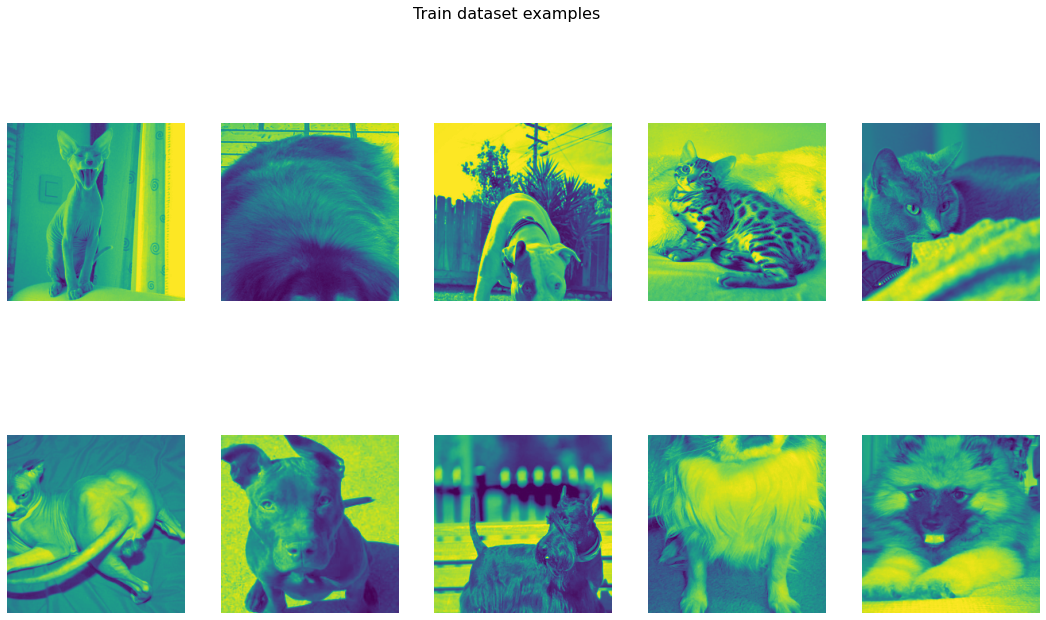

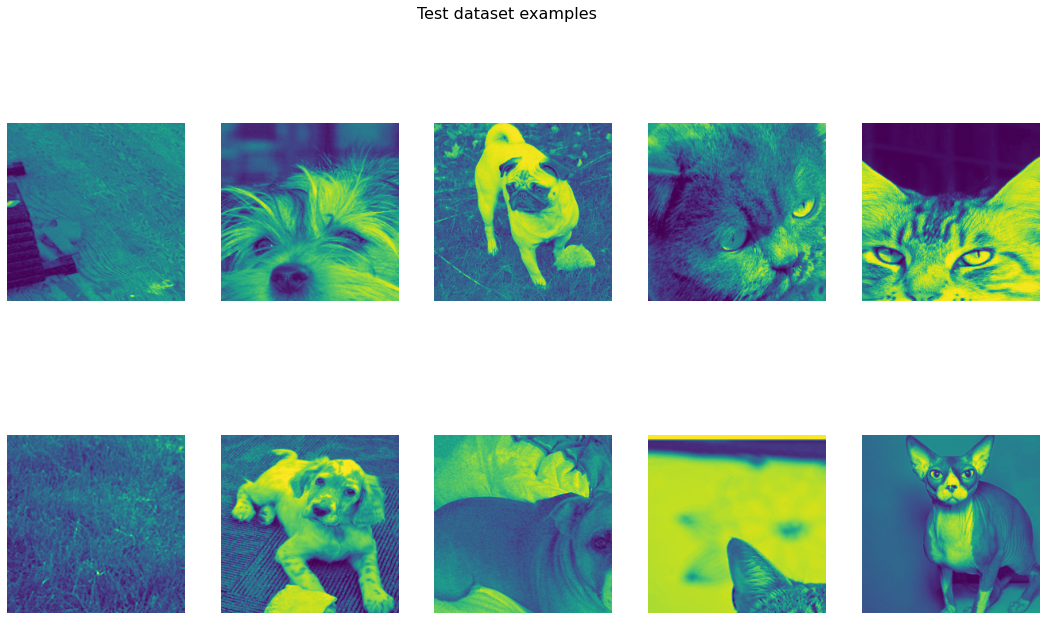

In [ ]:
##### VISUALIZZAZIONE DI 10 IMG DI TRAINING E 10 DI TESTING #######à

fig_train, axs_train = plt.subplots(2, 5)
fig_train.set_size_inches(18.5, 10.5)
fig_train.suptitle("Train dataset examples", fontsize=16)
for i in range(2):
  for j in range(5):
    axs_train[i, j].imshow(train_dataset[random.randint(0,len(train_dataset))][0][0])
    axs_train[i, j].axis('off')

fig_test, axs_test = plt.subplots(2, 5)
fig_test.set_size_inches(18.5, 10.5)
fig_test.suptitle("Test dataset examples", fontsize=16)
for i in range(2):
  for j in range(5):
    axs_test[i, j].imshow(test_dataset[random.randint(0,len(test_dataset))][0][0])
    axs_test[i, j].axis('off')

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=8,
    shuffle=True,  # set to True to have the data reshuffled at every epoch
    num_workers=4  # how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=4
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torchvision.models import ViT_L_16_Weights

# https://pytorch.org/vision/main/models/generated/torchvision.models.vit_b_16.html#torchvision.models.ViT_B_16_Weights
# i pesi della rete sono scelti in modo da essere simili a quelli del modello ResNet
model = models.vit_l_16(weights = ViT_L_16_Weights.IMAGENET1K_V1)
model.heads=torch.nn.Sequential(torch.nn.Linear(model.heads.head.in_features, 512),
torch.nn.ReLU(inplace=False),
torch.nn.Dropout(0.5),  
torch.nn.Linear(512, 256),
torch.nn.ReLU(inplace=False),
torch.nn.Dropout(0.5),  
torch.nn.Linear(256, 100),
torch.nn.ReLU(inplace=False),
torch.nn.Dropout(0.5),  
torch.nn.Linear(100, 37))
model.get_parameter


Downloading: "https://download.pytorch.org/models/vit_l_16-852ce7e3.pth" to /root/.cache/torch/hub/checkpoints/vit_l_16-852ce7e3.pth


  0%|          | 0.00/1.13G [00:00<?, ?B/s]

<bound method Module.get_parameter of VisionTransformer(
  (conv_proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=1024, out_features=4096, bias=True)
          (1): GELU(approximate=none)
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=4096, out_features=1024, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((1024,), eps=1e-

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

NUM_EPOCHS = 25
device = torch.device('cuda')
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_acc = []
train_loss = []
test_acc = []
test_loss = []
y_pred = []
y_true = []
cont = 0

print(len(train_dataset))

for epoch in range(NUM_EPOCHS):
    
    train_error_count = 0.0
    loss_cum = 0
    correct = 0
    total = 0
    for images, labels in iter(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        criterion = torch.nn.CrossEntropyLoss()
        loss = criterion(outputs, labels)   

        loss.backward()
        optimizer.step()

        loss_cum += loss.item()   # sommo il valore di loss di ogni immagine
        cont = cont + 1 

        train_error_count += float(torch.sum(torch.abs(labels - outputs.argmax(1))))
        
        _, predicted = outputs.max(1)
        total += int(labels.shape[0])
        correct += predicted.eq(labels).sum().item()
        
    train_acc.append(correct/total)

    train_loss.append((loss_cum/len(train_dataset))) # lo aggiungo alla lista delle loss di ogni epoca
    loss_cum = 0
    cont = 0
 
    test_error_count = 0.0
    correct = 0
    total = 0
    for images, labels in iter(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)        
        criterion = torch.nn.CrossEntropyLoss()
        loss = criterion(outputs, labels)   

        loss.backward()
        optimizer.step()

        # loss.item() contains the loss of the entire mini-batch,  It’s because the loss
        # given loss functions is divided by the number of elements i.e. the reduction parameter is mean by default(divided by the batch size)
        loss_cum += loss.item()   # sommo il valore di loss di ogni immagine
        cont = cont + 1  

        test_error_count += float(torch.sum(torch.abs(labels - outputs.argmax(1))))

        _, predicted = outputs.max(1)
        total += int(labels.shape[0])
        correct += predicted.eq(labels).sum().item()

        output = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
        
        

    test_acc.append(correct/total)

    test_loss.append((loss_cum/len(test_dataset))) # lo aggiungo alla lista delle loss di ogni epoca
    cont = 0

    print("Epoch {}/{}, Train Loss: {:.3f}, Test Loss: {:.3f}, Train Accuracy: {:.3f}, Test Accuracy: {:.3f}".format(epoch+1,NUM_EPOCHS,train_loss[epoch],test_loss[epoch],train_acc[epoch],test_acc[epoch],))

5912
Epoch 1/25, Train Loss: 0.296, Test Loss: 0.157, Train Accuracy: 0.344, Test Accuracy: 0.614
Epoch 2/25, Train Loss: 0.117, Test Loss: 0.098, Train Accuracy: 0.702, Test Accuracy: 0.757
Epoch 3/25, Train Loss: 0.088, Test Loss: 0.081, Train Accuracy: 0.793, Test Accuracy: 0.811
Epoch 4/25, Train Loss: 0.079, Test Loss: 0.069, Train Accuracy: 0.827, Test Accuracy: 0.843
Epoch 5/25, Train Loss: 0.068, Test Loss: 0.065, Train Accuracy: 0.849, Test Accuracy: 0.870
Epoch 6/25, Train Loss: 0.062, Test Loss: 0.063, Train Accuracy: 0.868, Test Accuracy: 0.867
Epoch 7/25, Train Loss: 0.057, Test Loss: 0.060, Train Accuracy: 0.879, Test Accuracy: 0.876
Epoch 8/25, Train Loss: 0.055, Test Loss: 0.055, Train Accuracy: 0.887, Test Accuracy: 0.892
Epoch 9/25, Train Loss: 0.054, Test Loss: 0.049, Train Accuracy: 0.888, Test Accuracy: 0.900
Epoch 10/25, Train Loss: 0.050, Test Loss: 0.043, Train Accuracy: 0.900, Test Accuracy: 0.909
Epoch 11/25, Train Loss: 0.045, Test Loss: 0.047, Train Accuracy

In [ ]:
print("TRAIN LOSS: ")
for i in range(NUM_EPOCHS):
  print(str(round(train_loss[i],3)) + ",", end=" ")
print("\n")

print("TRAIN ACCURACY: ")
for i in range(NUM_EPOCHS):
  print(str(round(train_acc[i],3)) + ",", end=" ")
print("\n")

print("TEST LOSS: ")
for i in range(NUM_EPOCHS):
  print(str(round(test_loss[i],3)) + ",", end=" ")
print("\n")

print("TEST ACCURACY: ")
for i in range(NUM_EPOCHS):
  print(str(round(test_acc[i],3)) + ",", end=" ")

TRAIN LOSS: 
0.296, 0.117, 0.088, 0.079, 0.068, 0.062, 0.057, 0.055, 0.054, 0.05, 0.045, 0.046, 0.045, 0.041, 0.04, 0.042, 0.039, 0.036, 0.034, 0.032, 0.035, 0.035, 0.034, 0.03, 0.029, 

TRAIN ACCURACY: 
0.344, 0.702, 0.793, 0.827, 0.849, 0.868, 0.879, 0.887, 0.888, 0.9, 0.91, 0.91, 0.907, 0.919, 0.921, 0.919, 0.925, 0.932, 0.935, 0.938, 0.936, 0.935, 0.936, 0.941, 0.945, 

TEST LOSS: 
0.157, 0.098, 0.081, 0.069, 0.065, 0.063, 0.06, 0.055, 0.049, 0.043, 0.047, 0.041, 0.044, 0.038, 0.037, 0.037, 0.036, 0.035, 0.03, 0.04, 0.034, 0.027, 0.029, 0.029, 0.027, 

TEST ACCURACY: 
0.614, 0.757, 0.811, 0.843, 0.87, 0.867, 0.876, 0.892, 0.9, 0.909, 0.911, 0.913, 0.904, 0.924, 0.934, 0.924, 0.934, 0.932, 0.943, 0.929, 0.94, 0.948, 0.947, 0.944, 0.949, 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, NUM_EPOCHS), train_acc, label="Train accuracy")
plt.plot(np.arange(0, NUM_EPOCHS), train_loss, label="Train loss")
plt.plot(np.arange(0, NUM_EPOCHS), test_acc, label="Test accuracy")
plt.plot(np.arange(0, NUM_EPOCHS), test_loss, label="Test loss")
plt.title("Accuracy [Pet Dataset]")
plt.xlabel("Epoche")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="center")

In [ ]:
from numpy.core.fromnumeric import size
# https://christianbernecker.medium.com/how-to-create-a-confusion-matrix-in-pytorch-38d06a7f04b7
# Build confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_matrix = confusion_matrix(y_true, y_pred)

cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['Blight', 'Common_Rust','Gray_Leaf_Spot','Healthy'])
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)